In [1]:
from google.colab import files
data = files.upload()

Saving bank.csv to bank.csv


In [2]:
import pandas as pd
data = pd.read_csv('bank.csv',sep= ';') 

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#treatment exposure definition
import numpy as np
col         = 'duration'
conditions  = [ data[col] <=150, (data[col] >150)  ]
choices     = [ 0, 1 ]
    
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)

In [5]:
#treatment exposure definition
import numpy as np
col         = 'duration'
conditions  = [ data[col] <=150, (data[col] >150)  ]
choices     = [ 0, 1 ]
    
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,treatment_tag
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1.0


In [7]:

# Preprocess data
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
treatment_tag = 'treatment_tag'
conversion = 'y'

In [8]:
X = data.drop([conversion], axis=1)
y = data[conversion]

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# # Load the data
# data = pd.read_csv('data.csv')

# # Define the categorical and numerical columns
# cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome']
# num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Preprocess the data
encoder = OneHotEncoder(sparse=False)
X_cat = encoder.fit_transform(data[cat_cols])
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])
X = np.hstack((X_cat, X_num))
y = data['y']
treatment = data['treatment_tag']

# Split the data into treatment and control groups
X_treat = X[treatment == 1]
y_treat = y[treatment == 1]
X_ctrl = X[treatment == 0]
y_ctrl = y[treatment == 0]

# Fit a classification model for each group
model_treat = LogisticRegression()
model_treat.fit(X_treat, y_treat)
model_ctrl = LogisticRegression()
model_ctrl.fit(X_ctrl, y_ctrl)

# Calculate the uplift score for each observation
uplift_scores = model_treat.predict_proba(X)[:, 1] - model_ctrl.predict_proba(X)[:, 1]

# Rank the observations and recommend products to the top-ranked individuals
recommendations = data.loc[uplift_scores.argsort()[::-1], ['age', 'job', 'marital', 'education', 'balance']]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict outcomes for treatment group
y_treat_pred = model_treat.predict(X_treat)
print("Treatment group performance:")
print("Accuracy:", accuracy_score(y_treat, y_treat_pred))
print("F1 score:", f1_score(y_treat, y_treat_pred, pos_label='yes'))
print("Precision:", precision_score(y_treat, y_treat_pred, pos_label='yes'))
print("Recall:", recall_score(y_treat, y_treat_pred, pos_label='yes'))

# Predict outcomes for control group
y_ctrl_pred = model_ctrl.predict(X_ctrl)
# Evaluate performance metrics for control group
print("Control group performance:")
print("Accuracy:", accuracy_score(y_ctrl, y_ctrl_pred))
print("F1 score:", f1_score(y_ctrl, y_ctrl_pred, pos_label='yes'))
print("Precision:", precision_score(y_ctrl, y_ctrl_pred, pos_label='yes'))
print("Recall:", recall_score(y_ctrl, y_ctrl_pred, pos_label='yes'))


Treatment group performance:
Accuracy: 0.8550185873605948
F1 score: 0.4743935309973045
Precision: 0.6795366795366795
Recall: 0.36438923395445133
Control group performance:
Accuracy: 0.9792463134898962
F1 score: 0.05
Precision: 0.5
Recall: 0.02631578947368421


In [ ]:
recommendations

,age,job,marital,education,balance
1279,32,management,married,tertiary,913
1952,41,admin.,divorced,secondary,6046
3250,54,technician,married,tertiary,876
110,21,student,single,secondary,2488
1342,27,admin.,married,secondary,710
...,...,...,...,...,...
358,48,admin.,divorced,secondary,4099
3636,36,management,divorced,tertiary,1057
78,50,blue-collar,divorced,primary,388
2471,22,student,single,secondary,2488


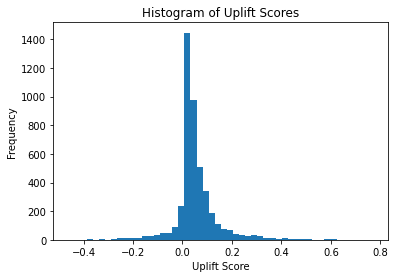

In [ ]:
import matplotlib.pyplot as plt

plt.hist(uplift_scores, bins=50)
plt.title("Histogram of Uplift Scores")
plt.xlabel("Uplift Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# print(model_treat.coef_) # print the coefficients of the treatment group model
# print(model_ctrl.coef_) # print the coefficients of the control group model


In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=8fe9319dcc18766f12e782e6238eceeb57a34dee8180

In [ ]:
%%writefile app.py
import ssl
ssl._create_default_https_context= ssl._create_unverified_context
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the data
data = pd.read_csv('bank.csv',sep= ';')

#treatment exposure definition
import numpy as np
col         = 'duration'
conditions  = [ data[col] <=150, (data[col] >150)  ]
choices     = [ 0, 1 ]
    
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)

#treatment exposure definition
import numpy as np
col         = 'duration'
conditions  = [ data[col] <=150, (data[col] >150)  ]
choices     = [ 0, 1 ]
    
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)

# Define the categorical and numerical columns
# Preprocess data
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
treatment_tag = 'treatment_tag'
conversion = 'y'

X = data.drop([conversion], axis=1)
y = data[conversion]

# Preprocess the data
encoder = OneHotEncoder(sparse=False)
X_cat = encoder.fit_transform(data[cat_cols])
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])
X = np.hstack((X_cat, X_num))
y = data['y']
treatment = data['treatment_tag']

# Split the data into treatment and control groups
X_treat = X[treatment == 1]
y_treat = y[treatment == 1]
X_ctrl = X[treatment == 0]
y_ctrl = y[treatment == 0]

# Fit a classification model for each group
model_treat = LogisticRegression()
model_treat.fit(X_treat, y_treat)
model_ctrl = LogisticRegression()
model_ctrl.fit(X_ctrl, y_ctrl)

# Calculate the uplift score for each observation
uplift_scores = model_treat.predict_proba(X)[:, 1] - model_ctrl.predict_proba(X)[:, 1]

# Rank the observations and recommend products to the top-ranked individuals
recommendations = data.loc[uplift_scores.argsort()[::-1], ['age', 'job', 'marital', 'education', 'balance']]

# Define the Streamlit app
def app():
    st.title('Uplift Modeling App')
    
    # Create a slider for selecting the number of recommendations
    num_rec = st.slider('Number of Recommendations', 1, 100, 10)
    
    # Show the top recommended individuals and their features
    st.subheader('Top Recommended Individuals')
    st.table(recommendations.head(num_rec))
    
    # Show the model performance for each group
    st.subheader('Model Performance')
    st.write('Treatment Group:')
    y_treat_pred = model_treat.predict(X_treat)
    st.write('Accuracy:', accuracy_score(y_treat, y_treat_pred))
    st.write('F1 Score:', f1_score(y_treat, y_treat_pred, pos_label='yes'))
    st.write('Precision:', precision_score(y_treat, y_treat_pred, pos_label='yes'))
    st.write('Recall:', recall_score(y_treat, y_treat_pred, pos_label='yes'))
    
    st.write('Control Group:')
    y_ctrl_pred = model_ctrl.predict(X_ctrl)
    st.write('Accuracy:', accuracy_score(y_ctrl, y_ctrl_pred))
    st.write('F1 Score:', f1_score(y_ctrl, y_ctrl_pred, pos_label='yes'))
    st.write('Precision:', precision_score(y_ctrl, y_ctrl_pred, pos_label='yes'))
    st.write('Recall:', recall_score(y_ctrl, y_ctrl_pred, pos_label='yes'))
    
if __name__ == '__main__':
    app()


Writing app.py


## Install localtunnel

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.465s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



## Run streamlit in background

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.682s
your url is: https://violet-kiwis-film-34-171-18-193.loca.lt


# Disconnect Runtime
To rerun Disconnect & Delete Runtime.